# No1 USA Stock Study 11-4-2020

## import data From USA Stock

In [1]:
import talib as ta
import matplotlib.pyplot as plt
plt.style.use('bmh')
import yfinance as yf
stock = 'AMZN'
aapl = yf.download(stock, '2000-1-1', '2020-4-10')
del aapl['Close']
aapl.rename(columns={'Adj Close': 'Close', 'Volume': 'Volume_BTC'}, inplace=True)
aapl.to_excel("D:\Stock Market\Daily\Test\sa Stock\AMZN.xlsx", sheet_name=stock, index=True)

[*********************100%***********************]  1 of 1 completed


In [2]:
aapl.tail(10)

,Open,High,Low,Close,Volume_BTC
Date,,,,,
2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,5387900
2020-03-30,1922.829956,1973.630005,1912.339966,1963.949951,6126100
2020-03-31,1964.349976,1993.020020,1944.010010,1949.719971,5123600
2020-04-01,1932.969971,1944.959961,1893.000000,1907.699951,4121900
2020-04-02,1901.640015,1927.530029,1890.000000,1918.829956,4336000
2020-04-03,1911.150024,1926.329956,1889.150024,1906.589966,3609900
2020-04-06,1936.000000,1998.520020,1930.020020,1997.589966,5773200
2020-04-07,2017.109985,2035.719971,1997.619995,2011.599976,5114000
2020-04-08,2021.000000,2044.000000,2011.150024,2043.000000,3977300


## Plot Parapolic SAR

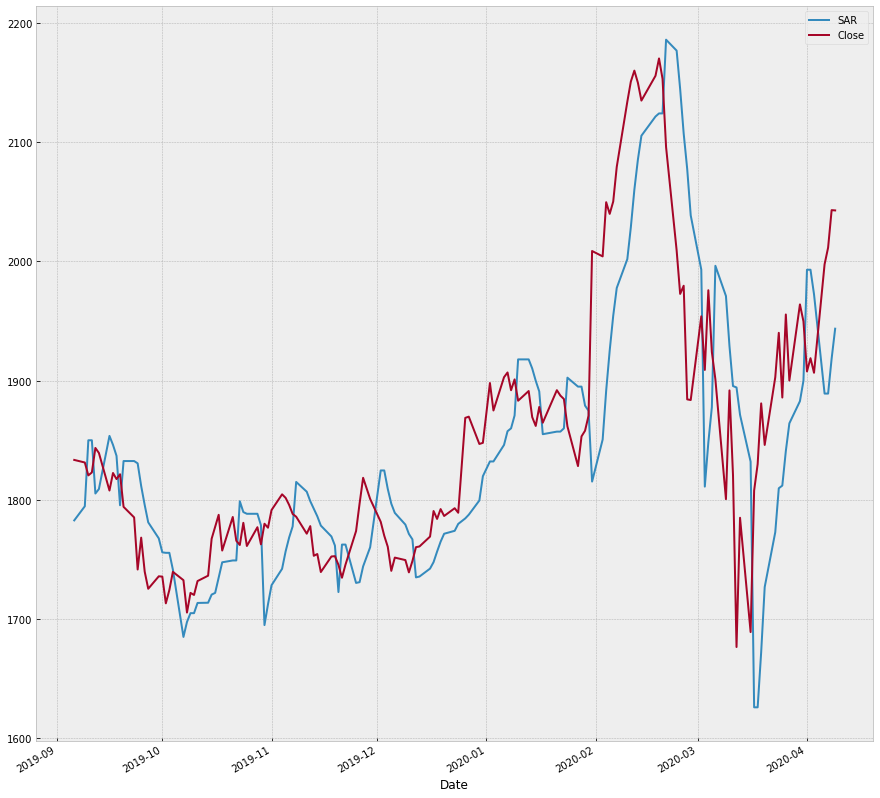

In [10]:
import talib
import talib as ta
import matplotlib.pyplot as plt
plt.style.use('bmh')
# Init Logging Facilities
log = logging.getLogger(__name__)
aapl['SAR'] = ta.SAR(aapl['High'],aapl['Low'],14)
aapl[['SAR','Close']].tail(150).plot(figsize=(15,15))
plt.show()

## Calculation

In [3]:
import pandas as pd
import ta
import glob
# Import Built-Ins
import logging
# Import Third-Party
# Import Homebrew
import matplotlib.pyplot as plt

plt.style.use('bmh')
# Init Logging Facilities
log = logging.getLogger(__name__)
#################################################################
# 1- Load data
indicators_value = []
ticker_name = []
glob.glob("D:\Stock Market\Daily\Test\sa Stock\*.xlsx")
for f in glob.glob('D:\Stock Market\Daily\Test\sa Stock\*.xlsx'):
    df = pd.read_excel(f)
   # df.columns = map(str.capitalize, df.columns)
    #df.rename(columns={'Volume': 'Volume_BTC'}, inplace=True)
    tike = f.split('\\')[-1].split('.')[0]
    print(tike)
    df.insert(1, 'TICKER', tike)  # to bring excel file name
    # Clean nan values
    df = ta.utils.dropna(df)
    ####################################################################
    # 2-Add all ta features filling nans values (from Ta-Lib Except SuperTrend Because not in Ta-Lib)
    df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume_BTC", fillna=True)

    #####################################################################
    # 3- Calculate
    df['Signal'] = 0
    sell = []
    buy = []
    date_sell = []
    date_buy = []
    indicators = ['trend_psar']  # The indicators to be studied
    for indicator in indicators:
        # 3.1 Determine the Date of  first buy signal and then exit the loop
        for y in range(10, len(df.index)):
            if df[indicator].iloc[y] <= df['Close'].iloc[y] and (df[indicator].iloc[y - 1] > df['Close'].iloc[y - 1]):
                first_buy_signal = y
                break
        '''
        # 3.2 Beginning of the study of buying and selling signals from the day before the date of the first purchase signal 
        (identified from the previous step) to ensure that the study begins with a buy signal, not selling   '''

        for x in range(first_buy_signal - 1, len(df.index)):
            if df[indicator].iloc[x] >= df['Close'].iloc[x] and (df[indicator].iloc[x - 1] < df['Close'].iloc[x - 1]):
                df['Signal'].iloc[x] = 'Sell'
                sell.append(df['Close'].iloc[x])
                date_sell.append(df['Date'].iloc[x])
            elif df[indicator].iloc[x] <= df['Close'].iloc[x] and (df[indicator].iloc[x - 1] > df['Close'].iloc[x - 1]):
                df['Signal'].iloc[x] = 'Buy'
                buy.append(df['Close'].iloc[x])
                date_buy.append(df['Date'].iloc[x])
        print(len(buy))
        print(len(sell))
        ''' To avoid the presence of a buy signal at the end of operations without the presence of a buy signal, 
        therefore the two columns do not contain the same number and the accounts are stopped '''
        if len(buy) != len(sell):  # To avoid
            del buy[-1]
            del date_buy[-1]
        profits = pd.DataFrame()
        profits['Buy'] = buy
        profits['Buy Date'] = date_buy
        profits['Sell'] = sell
        profits['Sell Date'] = date_sell
        profits['Profits'] = ((profits['Sell'] - profits['Buy']) / profits['Buy']) * 100
        # profits.drop(profits.tail(1).index, inplace=True)  # drop last n rows
        sum(profits['Profits'])
        profits.round(2).to_excel(f'{f}.xlsx', sheet_name="indicator Osama", index=True, index_label="TICKER")
        indicators_value.append(sum(profits['Profits']))
    #########################################################################
    tik = df.iloc[0]['TICKER']
    ticker_name.append(tik)
dictionary = dict(zip(ticker_name, indicators_value))
basic = pd.DataFrame(indicators_value, ticker_name)
indicators_na = pd.DataFrame(indicators, index=[0])
final_results = pd.concat([indicators_na, basic], axis=0)
# final_results.insert(0, 'TICKER', tike)
final_results.round(2).to_excel('D:\Stock Market\Daily\Test\ok\indicators.xlsx', sheet_name="indicator Osama",
                                index=True, index_label="TICKER")
print(final_results)


AMZN


C:\Python\lib\site-packages\ta\trend.py:567: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
C:\Python\lib\site-packages\ta\trend.py:571: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])
C:\Python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


224
223
               0
0     trend_psar
AMZN     279.114


In [4]:
aapl['SAR'] = ta.SAR(aapl['High'],aapl['Low'],14)
aapl[['SAR','Close']].tail(2800).plot(figsize=(15,15))
plt.show()

AttributeError: module 'ta' has no attribute 'SAR'